<a href="https://colab.research.google.com/github/Mohit501/Text-Classification-NLP-Tutorial-/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import pickle
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading Data

In [2]:
reviews = load_files('/content/drive/MyDrive/txt_sentoken')
X,y = reviews.data,reviews.target

## Storing Data as Pickle File

In [3]:
with open('X.pickle','wb') as f:
  pickle.dump(X,f)
with open('y.pickle','wb') as f:
  pickle.dump(y,f)


#Creating a corpus

In [4]:
corpus = []
for i in range(0,len(X)):
  review = re.sub(r'\W',' ',str(X[i]))
  review = review.lower()
  review = re.sub(r'\s+[a-z]\s+',' ',review)
  review = re.sub(r'^[a-z]\s+',' ',review)
  review = re.sub(r'\s+',' ',review)
  corpus.append(review)

In [5]:
corpus[32]

' the idea at the center of the devil advocate which is thus far one of the three or four best films of 1997 is that no matter what decision is made evil will triumph god is trickster satan is humanist the last humanist nhe appears in many guises and seduces many men and women in his own words vanity by far my favorite sin nal pacino plays this role with relish and gets to chew some delectable lines lemme givya piece inside wisdom on god have million names as john milton the devil nthe main idea that he can appear as anyone in any form in this case buisness man harkens mainly back to terry gilliam the time bandits nbut the film is something else something original npart of what makes it so very good is that it never takes itself too seriously it dabbles with morality vanity death and child abuse but doesn try to become any profound study of power nthis is marvelous confection cocky funny thought provoking nit is also entertaining nthere is no way you could possibly predict the ending i

# Creating a BOW Model

In [6]:
vectorizer = TfidfVectorizer(max_features=2000,min_df=3,max_df=0.6,stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

# Splitting into train and test data

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)

#Text Classification using Logistic Regression

In [8]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Confusion_matrix

In [9]:
prediction = clf.predict(X_test)

In [10]:
confusionmatrix = confusion_matrix(y_test,prediction) 

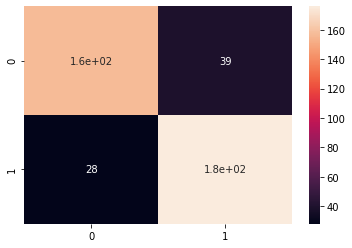

In [11]:
sb.heatmap(confusionmatrix,annot = True)

In [12]:
confusionmatrix[0][0] + confusionmatrix[1][1]

333

In [13]:
337/4

84.25

# Saving Our Model

In [14]:
with open('clf.pickle','wb') as f:
  pickle.dump(clf,f)

In [15]:
with open('tfidfmodel.pickle','wb') as f:
  pickle.dump(vectorizer,f)

# Loading our Model

In [16]:
with open('clf.pickle','rb') as f:
  clf = pickle.load(f)

In [17]:
with open('tfidfmodel.pickle','rb') as f:
  tfidf = pickle.load(f)

In [18]:
sample = ["You are not a very nice person,have bad good life"]
sample = tfidf.transform(sample).toarray()

In [19]:
sample

array([[0., 0., 0., ..., 0., 0., 0.]])

In [20]:
clf.predict(sample)

array([1])